In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 99% 1.06G/1.06G [00:05<00:00, 175MB/s]
100% 1.06G/1.06G [00:05<00:00, 222MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [8]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
conv_base.trainable = False

In [13]:
from keras.utils import image_dataset_from_directory, array_to_img, img_to_array, load_img

In [14]:
batch_size = 32

train_ds = image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

validation_ds = image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(
    train_ds,
    epochs=1,
    validation_data=validation_ds
)

625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.9255 - loss: 1.1867 - val_accuracy: 0.9464 - val_loss: 0.1405


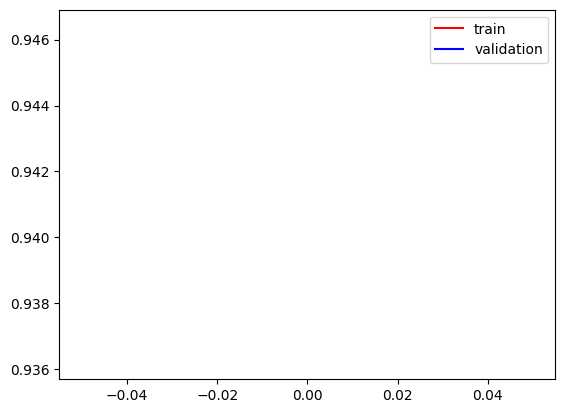

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

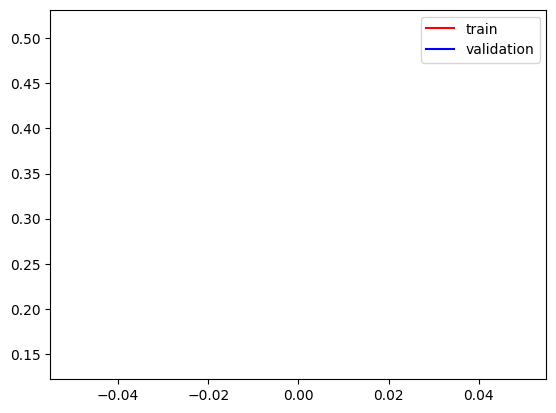

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()